In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab #для работы с матрицами (суть - центровка графика)
from matplotlib.pyplot import figure

In [4]:
plt.style.use('ggplot') #стиль графика - популярный в R

In [5]:
# вывод графиков в jupyter
%matplotlib inline

In [6]:
# график 12 на 8
matplotlib.rcParams['figure.figsize'] = (12,8)

In [7]:
# отключение предупреждения о цепочных присваиваниях в pandas чтобы не мешало наализу данных
pd.options.mode.chained_assignment = None

In [8]:
df_sber = pd.read_csv('https://raw.githubusercontent.com/RShoose/Data/main/subset_data.csv')

In [9]:
df_sber

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,10309,11065.0,5,0,240.0,1,0,7,3,no
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,7759,6237.0,8,0,229.0,1,0,6,1,yes
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,6207,5580.0,7,0,1183.0,1,0,5,1,no
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,13670,17063.0,10,0,NaN,1,0,17,6,no
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,6748,7770.0,9,0,562.0,4,2,25,2,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,2015-06-30,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,...,10311,12721.0,4,0,NaN,1,0,10,3,no
30467,30470,2015-06-30,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,...,6398,6772.0,4,1,1046.0,3,2,29,16,yes
30468,30471,2015-06-30,45,NaN,10.0,20.0,1.0,NaN,1.0,1.0,...,264,NaN,0,0,NaN,0,0,0,0,no
30469,30472,2015-06-30,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,...,4635,6083.0,8,0,3300.0,2,1,11,1,no


In [10]:
df_sber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     30471 non-null  int64  
 1   timestamp                              30471 non-null  object 
 2   full_sq                                30471 non-null  int64  
 3   life_sq                                24088 non-null  float64
 4   floor                                  30304 non-null  float64
 5   max_floor                              20899 non-null  float64
 6   material                               20899 non-null  float64
 7   build_year                             16866 non-null  float64
 8   num_room                               20899 non-null  float64
 9   kitch_sq                               20899 non-null  float64
 10  state                                  16912 non-null  float64
 11  pr

## Поиск пропущенных значений при помощи визуализации

In [11]:
df_sber.isnull()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25
0,False,False,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,True,True,True,True,...,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
30467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30468,False,False,False,True,False,False,False,True,False,False,...,False,True,False,False,True,False,False,False,False,False
30469,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<Axes: >

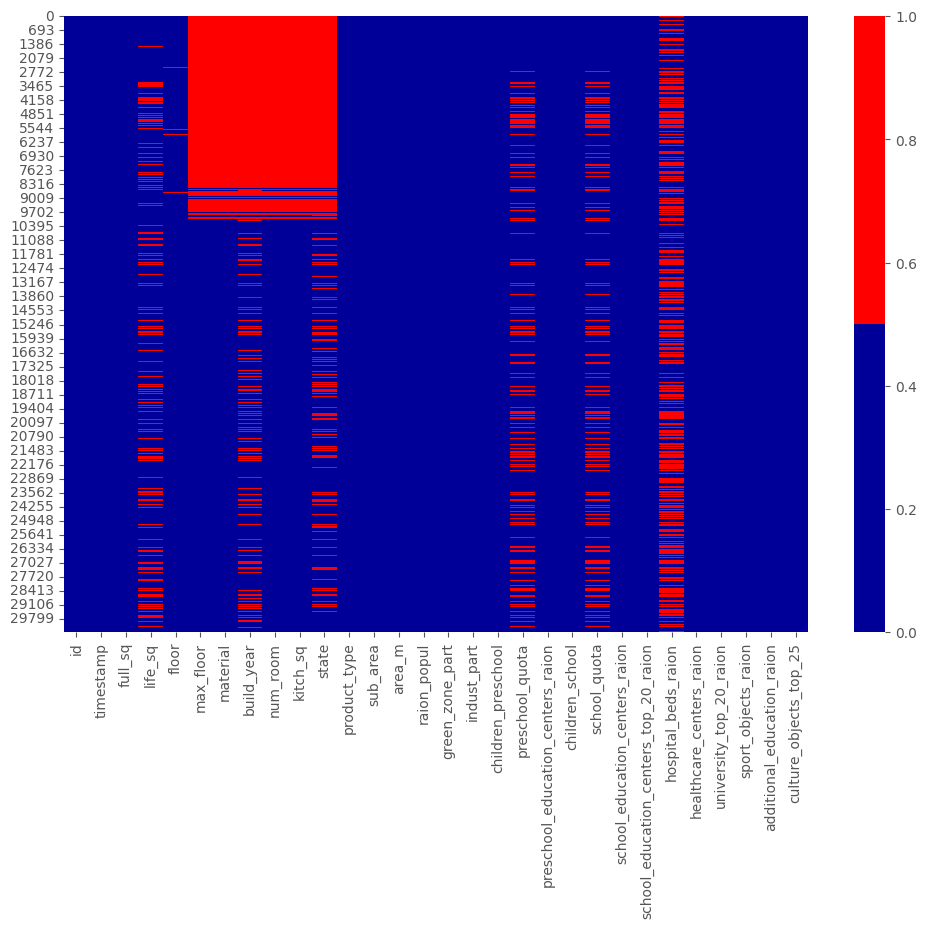

In [12]:
colours = ['#000099','#ff0000']
sns.heatmap(df_sber.isnull(), cmap=sns.color_palette(colours))

## Поиск пропущенных значений при помощий долей

In [13]:
df_sber.isnull().mean().sort_values()

id                                       0.000000
timestamp                                0.000000
full_sq                                  0.000000
green_zone_part                          0.000000
sub_area                                 0.000000
area_m                                   0.000000
raion_popul                              0.000000
product_type                             0.000000
healthcare_centers_raion                 0.000000
university_top_20_raion                  0.000000
school_education_centers_raion           0.000000
school_education_centers_top_20_raion    0.000000
children_school                          0.000000
preschool_education_centers_raion        0.000000
children_preschool                       0.000000
indust_part                              0.000000
culture_objects_top_25                   0.000000
additional_education_raion               0.000000
sport_objects_raion                      0.000000
floor                                    0.005481


In [14]:
for col in df_sber.columns:
    pct_missing = np.mean(df_sber[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 0%
timestamp - 0%
full_sq - 0%
life_sq - 21%
floor - 1%
max_floor - 31%
material - 31%
build_year - 45%
num_room - 31%
kitch_sq - 31%
state - 44%
product_type - 0%
sub_area - 0%
area_m - 0%
raion_popul - 0%
green_zone_part - 0%
indust_part - 0%
children_preschool - 0%
preschool_quota - 22%
preschool_education_centers_raion - 0%
children_school - 0%
school_quota - 22%
school_education_centers_raion - 0%
school_education_centers_top_20_raion - 0%
hospital_beds_raion - 47%
healthcare_centers_raion - 0%
university_top_20_raion - 0%
sport_objects_raion - 0%
additional_education_raion - 0%
culture_objects_top_25 - 0%


In [15]:
for col in df_sber.columns:
    pct_missing = np.mean(df_sber[col].isnull())
    print(f'{col} - {round(pct_missing*100)}%')

id - 0%
timestamp - 0%
full_sq - 0%
life_sq - 21%
floor - 1%
max_floor - 31%
material - 31%
build_year - 45%
num_room - 31%
kitch_sq - 31%
state - 44%
product_type - 0%
sub_area - 0%
area_m - 0%
raion_popul - 0%
green_zone_part - 0%
indust_part - 0%
children_preschool - 0%
preschool_quota - 22%
preschool_education_centers_raion - 0%
children_school - 0%
school_quota - 22%
school_education_centers_raion - 0%
school_education_centers_top_20_raion - 0%
hospital_beds_raion - 47%
healthcare_centers_raion - 0%
university_top_20_raion - 0%
sport_objects_raion - 0%
additional_education_raion - 0%
culture_objects_top_25 - 0%


In [16]:
df_sber.isnull().mean().sort_values(ascending = False) * 100

hospital_beds_raion                      47.392603
build_year                               44.649011
state                                    44.498047
material                                 31.413475
max_floor                                31.413475
num_room                                 31.413475
kitch_sq                                 31.413475
preschool_quota                          21.948738
school_quota                             21.938893
life_sq                                  20.947786
floor                                     0.548062
full_sq                                   0.000000
id                                        0.000000
timestamp                                 0.000000
area_m                                    0.000000
sub_area                                  0.000000
product_type                              0.000000
raion_popul                               0.000000
children_preschool                        0.000000
indust_part                    

## Что делать с пропущенными данными?

In [17]:
df_sber_copy = df_sber.copy()

In [18]:
for col in df_sber_copy:
    missing = df_sber[col].isnull()
    num_missing = np.sum(missing)
    if num_missing > 0:
        print('created missing indicator for: {}'.format(col))
        df_sber_copy['{}_ismissing'.format(col)] = missing

created missing indicator for: life_sq
created missing indicator for: floor
created missing indicator for: max_floor
created missing indicator for: material
created missing indicator for: build_year
created missing indicator for: num_room
created missing indicator for: kitch_sq
created missing indicator for: state
created missing indicator for: preschool_quota
created missing indicator for: school_quota
created missing indicator for: hospital_beds_raion


In [19]:
nans = df_sber.isnull().sum(axis=1).sort_values()
df_sber[nans > 5]

C:\Users\User\AppData\Local\Temp\ipykernel_12932\754715975.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_sber[nans > 5]


,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,10309,11065.0,5,0,240.0,1,0,7,3,no
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,7759,6237.0,8,0,229.0,1,0,6,1,yes
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,6207,5580.0,7,0,1183.0,1,0,5,1,no
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,13670,17063.0,10,0,NaN,1,0,17,6,no
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,6748,7770.0,9,0,562.0,4,2,25,2,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30395,30398,2015-06-24,38,NaN,4.0,17.0,1.0,NaN,1.0,1.0,...,264,NaN,0,0,NaN,0,0,0,0,no
30396,30399,2015-06-24,57,NaN,13.0,17.0,1.0,NaN,2.0,1.0,...,1437,NaN,0,0,NaN,0,0,3,3,no
30404,30407,2015-06-24,69,NaN,5.0,15.0,6.0,NaN,2.0,0.0,...,629,NaN,0,0,NaN,0,0,1,0,no
30428,30431,2015-06-26,41,NaN,4.0,15.0,4.0,NaN,1.0,0.0,...,629,NaN,0,0,NaN,0,0,1,0,no


In [20]:
df_less_missing_rows = df_sber[df_sber.isnull().sum(axis=1) <= 35]
df_less_missing_rows.isnull().sum()

id                                           0
timestamp                                    0
full_sq                                      0
life_sq                                   6383
floor                                      167
max_floor                                 9572
material                                  9572
build_year                               13605
num_room                                  9572
kitch_sq                                  9572
state                                    13559
product_type                                 0
sub_area                                     0
area_m                                       0
raion_popul                                  0
green_zone_part                              0
indust_part                                  0
children_preschool                           0
preschool_quota                           6688
preschool_education_centers_raion            0
children_school                              0
school_quota 

## Отбрасывание ненужных значений

In [104]:
cols_to_drop = ['hospital_beds_raion']
df_less_hos_beds_raion = df_sber.drop(cols_to_drop, axis = 1)

In [105]:
df_less_hos_beds_raion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     30471 non-null  int64  
 1   timestamp                              30471 non-null  object 
 2   full_sq                                30471 non-null  int64  
 3   life_sq                                24088 non-null  float64
 4   floor                                  30304 non-null  float64
 5   max_floor                              20899 non-null  float64
 6   material                               20899 non-null  float64
 7   build_year                             16866 non-null  float64
 8   num_room                               20899 non-null  float64
 9   kitch_sq                               20899 non-null  float64
 10  state                                  16912 non-null  float64
 11  pr

## Заполнение константами

In [107]:
df_sber['life_sq'].median()

np.float64(30.0)

In [108]:
med = df_sber['life_sq'].median()
df_sber['life_sq'] = df_sber['life_sq'].fillna(med)
# или df_sber['life_sq'].fillna(med, inplace=True) это в 1 строчку

In [117]:
df_sber['life_sq'].isnull().sum()

np.int64(0)

## Принудительное заполнение для всех числовых данных

In [130]:
df_sber_copy = df_sber.copy()
df_numeric = df_sber.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values

for col in numeric_cols:
    missing = df_sber[col].isnull()
    num_missing = np.sum(missing)

    if num_missing > 0:
        print('imputing missing values for: {}'.format(col))
        #df_sber_copy['{}_ismissing'.format(col)] = missing
        med = df_sber[col].median()
        df_sber[col] = df_sber[col].fillna(med)

imputing missing values for: floor
imputing missing values for: max_floor
imputing missing values for: material
imputing missing values for: build_year
imputing missing values for: num_room
imputing missing values for: kitch_sq
imputing missing values for: state
imputing missing values for: preschool_quota
imputing missing values for: school_quota
imputing missing values for: hospital_beds_raion


,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25
0,1,2011-08-20,43,27.0,4.0,12.0,1.0,1979.0,2.0,6.0,...,10309,11065.0,5,0,240.0,1,0,7,3,no
1,2,2011-08-23,34,19.0,3.0,12.0,1.0,1979.0,2.0,6.0,...,7759,6237.0,8,0,229.0,1,0,6,1,yes
2,3,2011-08-27,43,29.0,2.0,12.0,1.0,1979.0,2.0,6.0,...,6207,5580.0,7,0,1183.0,1,0,5,1,no
3,4,2011-09-01,89,50.0,9.0,12.0,1.0,1979.0,2.0,6.0,...,13670,17063.0,10,0,990.0,1,0,17,6,no
4,5,2011-09-05,77,77.0,4.0,12.0,1.0,1979.0,2.0,6.0,...,6748,7770.0,9,0,562.0,4,2,25,2,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,2015-06-30,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,...,10311,12721.0,4,0,990.0,1,0,10,3,no
30467,30470,2015-06-30,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,...,6398,6772.0,4,1,1046.0,3,2,29,16,yes
30468,30471,2015-06-30,45,30.0,10.0,20.0,1.0,1979.0,1.0,1.0,...,264,7377.0,0,0,990.0,0,0,0,0,no
30469,30472,2015-06-30,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,...,4635,6083.0,8,0,3300.0,2,1,11,1,no


## Замена пропущенных значений плейсхолдерами

In [138]:
df_sber.sub_area.value_counts()

sub_area
Poselenie Sosenskoe               1776
Nekrasovka                        1611
Poselenie Vnukovskoe              1372
Poselenie Moskovskij               925
Poselenie Voskresenskoe            713
                                  ... 
Molzhaninovskoe                      3
Poselenie Shhapovskoe                2
Poselenie Kievskij                   2
Poselenie Klenovskoe                 1
Poselenie Mihajlovo-Jarcevskoe       1
Name: count, Length: 146, dtype: int64

In [146]:
df_sber['sub_area'] = df_sber['sub_area'].fillna('_MISSING_')
df_sber['sub_area'].isnull().sum()

np.int64(0)

In [170]:
df = pd.read_csv('https://raw.githubusercontent.com/RShoose/Data/main/subset_data.csv')

## Выбросы

<Axes: >

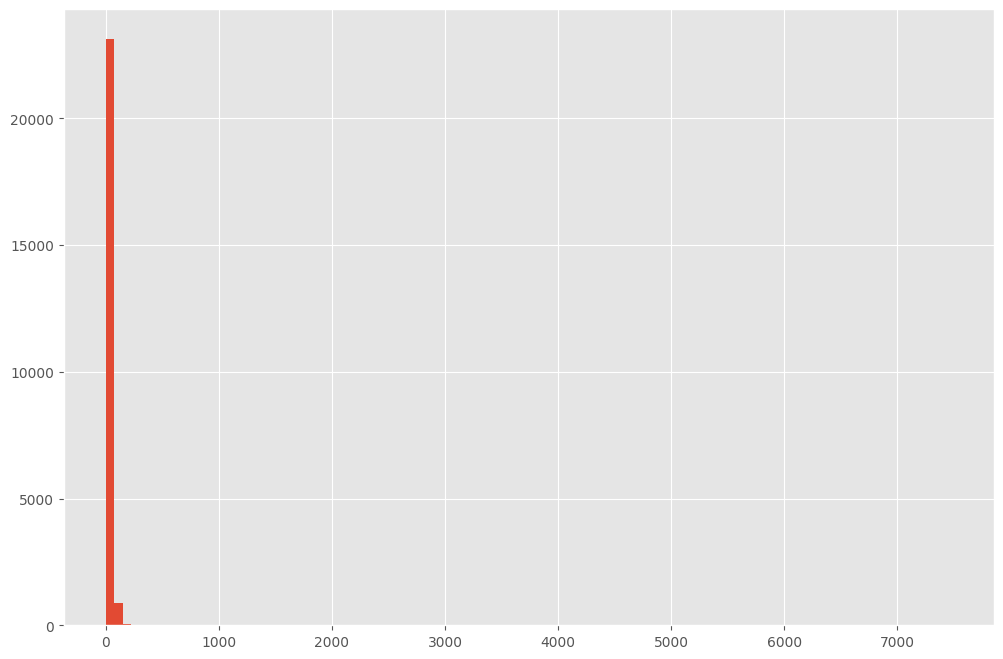

In [150]:
df['life_sq'].hist(bins=100)

<Axes: >

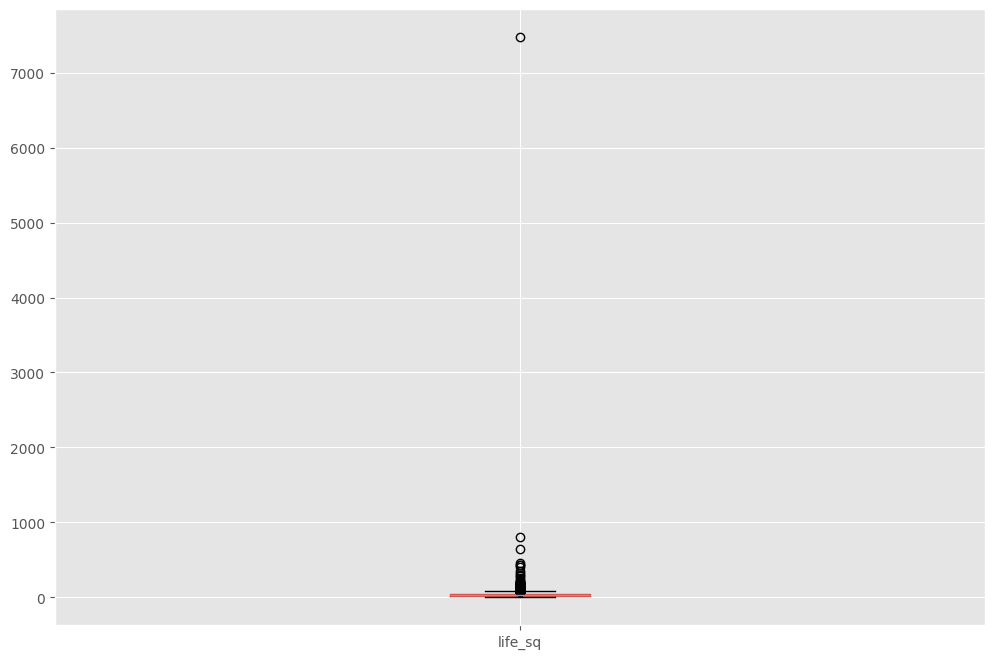

In [151]:
df.boxplot(column=['life_sq'])

In [152]:
df['life_sq'].describe()

count    24088.000000
mean        34.403271
std         52.285733
min          0.000000
25%         20.000000
50%         30.000000
75%         43.000000
max       7478.000000
Name: life_sq, dtype: float64

<Axes: xlabel='sub_area'>

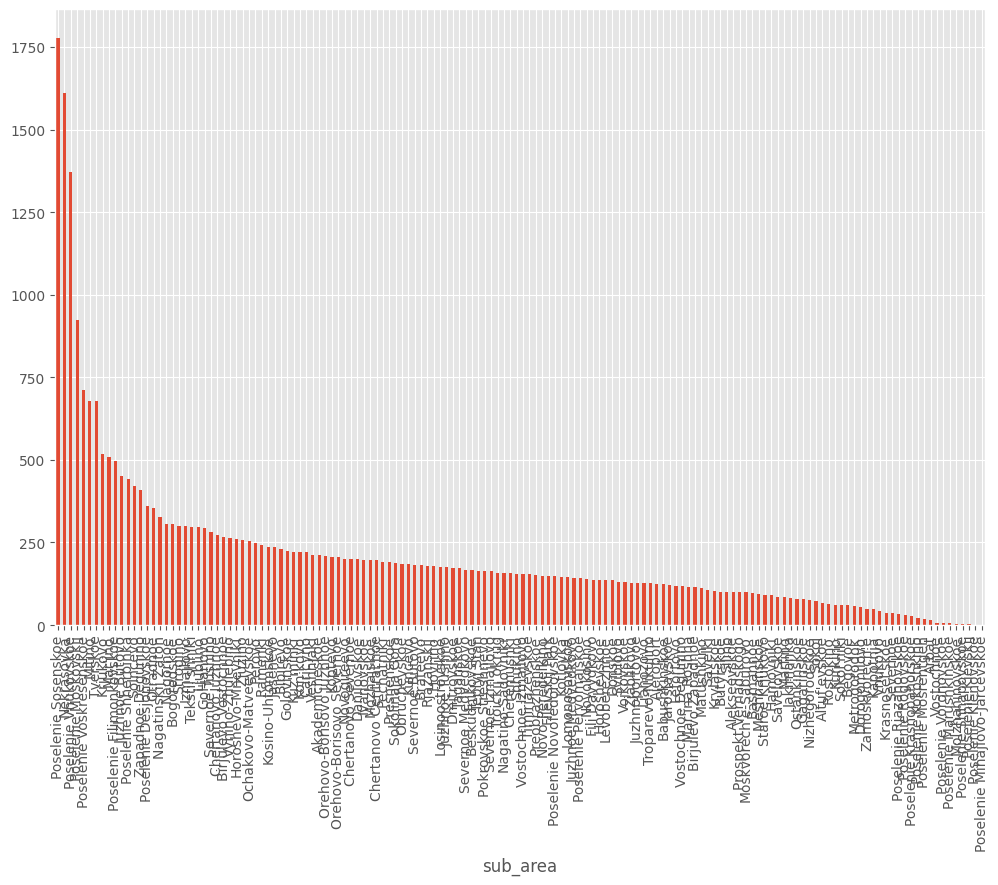

In [153]:
df['sub_area'].value_counts().plot.bar()

## Дубликаты записей

In [155]:
df_dedupped = df.drop('id', axis = 1).drop_duplicates()

print(df.shape)
print(df_dedupped.shape)

(30471, 30)
(30444, 29)


In [160]:
key = ['timestamp', 'full_sq', 'life_sq', 'floor', 'build_year', 'num_room', 'sub_area']
df.fillna(-999).groupby(key)['id'].count().sort_values(ascending=False).head(20)

timestamp   full_sq  life_sq  floor  build_year  num_room  sub_area                
2012-08-27  59       -999.0   6.0    -999.0      -999.0    Poselenie Sosenskoe         2
2012-10-22  61       -999.0   18.0   -999.0      -999.0    Mitino                      2
2013-04-03  42       -999.0   2.0    -999.0      -999.0    Poselenie Sosenskoe         2
2012-09-25  38       -999.0   17.0   -999.0      -999.0    Nekrasovka                  2
2013-05-22  68       -999.0   2.0    -999.0      -999.0    Poselenie Sosenskoe         2
2014-02-13  53       -999.0   1.0    -999.0       2.0      Poselenie Filimonkovskoe    2
2013-08-09  39       -999.0   6.0    -999.0      -999.0    Nekrasovka                  2
2013-06-27  51       -999.0   4.0    -999.0      -999.0    Nekrasovka                  2
2013-06-24  40       -999.0   12.0   -999.0      -999.0    Nekrasovka                  2
2012-12-19  58       -999.0   23.0   -999.0      -999.0    Poselenie Vnukovskoe        2
2012-06-27  32        18.0

In [164]:
df_dedupped2 = df.drop_duplicates(subset=key)
print(df.shape)
print(df_dedupped.shape)
print(df_dedupped2.shape)

(30471, 30)
(30444, 29)
(30437, 30)


## Разные форматы данных

In [165]:
df['sub_area_lower'] = df['sub_area'].str.lower()
df['sub_area_lower'].value_counts(dropna=False)

sub_area_lower
poselenie sosenskoe               1776
nekrasovka                        1611
poselenie vnukovskoe              1372
poselenie moskovskij               925
poselenie voskresenskoe            713
                                  ... 
molzhaninovskoe                      3
poselenie shhapovskoe                2
poselenie kievskij                   2
poselenie klenovskoe                 1
poselenie mihajlovo-jarcevskoe       1
Name: count, Length: 146, dtype: int64

In [171]:
df['timestamp_dt'] = pd.to_datetime(df['timestamp'], format='%Y-%n-%d')


ValueError: 'n' is a bad directive in format '%Y-%n-%d'